In [23]:
sixmp = read.table( "sixmp.txt" )
head(sixmp)

pairid,tpbo,t6mp,irelapse
1,1,10,1
2,22,7,1
3,3,32,0
4,12,23,1
5,8,22,1
6,17,6,1


In [26]:
#####	Transform data to long format
#####
##
sixmpLong = cbind( 	rep(sixmp$pairid, 2), c( sixmp$tpbo, sixmp$t6mp ), 
						          rep(0:1, each=21), c( rep(1,21), sixmp$irelapse ) )

sixmpLong = as.data.frame( sixmpLong )

names( sixmpLong ) = c( "pairid", "time", "sixmp", "irelapse" ) 

sixmpLong[ c(1:5,22:26), ]

,pairid,time,sixmp,irelapse
1,1,1,0,1
2,2,22,0,1
3,3,3,0,1
4,4,12,0,1
5,5,8,0,1
22,1,10,1,1
23,2,7,1,1
24,3,32,1,0
25,4,23,1,1
26,5,22,1,1


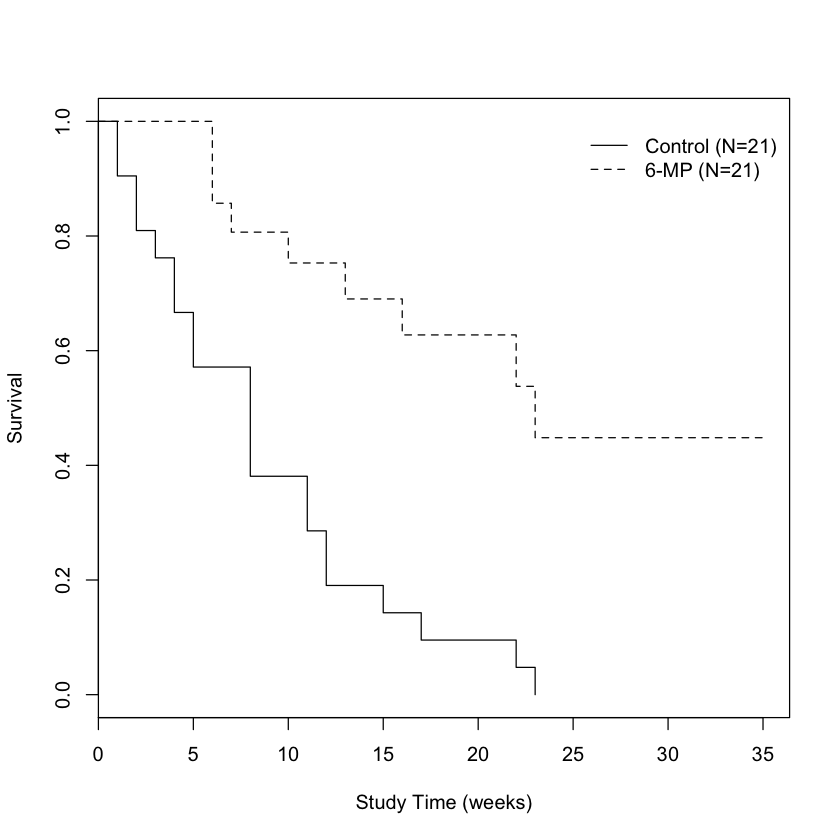

In [28]:
plot( survfit( Surv( time, irelapse ) ~ sixmp, data=sixmpLong ), lty=1:2, xlab="Study Time (weeks)", ylab="Survival" )
legend( 25, 1, lty=1:2, legend=c("Control (N=21)", "6-MP (N=21)"), bty="n" )

In [27]:
library( survival )
survdiff( Surv( time, irelapse ) ~ sixmp, data=sixmpLong )

Call:
survdiff(formula = Surv(time, irelapse) ~ sixmp, data = sixmpLong)

         N Observed Expected (O-E)^2/E (O-E)^2/V
sixmp=0 21       21     10.7      9.77      16.8
sixmp=1 21        9     19.3      5.46      16.8

 Chisq= 16.8  on 1 degrees of freedom, p= 4.17e-05 